In [1]:
%load_ext autoreload
%autoreload 2

from t_nachine.optimization import Analyzer
import pandas as pd
from tqdm import tqdm

/home/abdelelyds/Workspace/PythonProjects/just-trade-it/t_nachine/backtester/core/_plotting.py:43: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `core.set_bokeh_output(notebook=False)`.
  warnings.warn(


Loading BokehJS ...

In [59]:
path = "logs/bounce.csv"
df = pd.read_csv(path)

In [60]:
analyzer = Analyzer(df)

In [61]:
analyzer.win_rate

0.38353008926000576

In [62]:
analyzer.losing_streak_probability(n=4)

0.144

In [63]:
analyzer.winning_streak_probability(n=2)

0.147

In [64]:
analyzer.stats

Duration                         RiskToReward                 \
                 mean median min   max    std         mean median     min   
WinningTrade                                                                
False          13.736  7.000   0  1854 24.308       -1.045 -1.000 -16.429   
True           23.185 15.000   0  1068 31.244        2.039  2.000   0.010   

                           
                max   std  
WinningTrade               
False        -0.000 0.303  
True         17.378 0.365

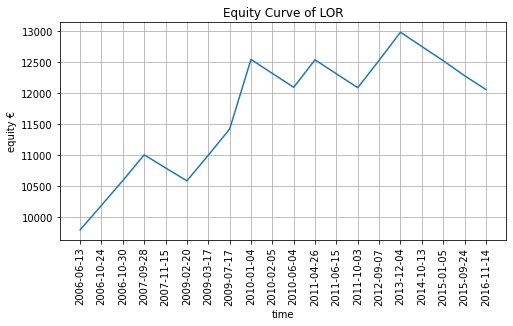

In [58]:
analyzer.plot_equity_curve()

In [13]:
def compute_cohots(price: float) -> int:
    
    if price <= 5:
        return 1
    
    if price <= 10:
        return 2
    
    if price <= 50:
        return 3
    
    if price <= 100:
        return 4
    
    if price <= 500:
        return 5
    
    if price <= 1000:
        return 6

    return 7

In [65]:
results = analyzer.backtest_results

In [68]:
results

,Size,EntryBar,ExitBar,OneR,SlPrice,TpPrice,EntryPrice,ExitPrice,MaxPnL,MaxNegativePnl,PnL,ReturnPct,EntryTime,ExitTime,Symbol,Duration,WinningTrade,RiskToReward
0,368,884,900,0.550,NaN,27.520,26.420,25.870,0.044,-0.500,-202.400,-0.021,2016-08-09,2016-08-31,vno_l,16,False,-1.000
1,351,856,928,0.570,NaN,26.830,25.690,25.120,0.774,-0.400,-200.070,-0.022,2016-06-29,2016-10-11,vno_l,72,False,-1.000
2,695,417,426,0.288,NaN,23.243,22.667,22.379,0.005,-0.268,-200.160,-0.013,2017-04-05,2017-04-19,roam,9,False,-1.000
3,938,1645,1664,0.213,2.023,2.663,2.237,2.663,0.397,-0.117,400.338,0.191,2011-10-10,2011-11-09,asur,19,True,2.000
4,877,1681,1686,0.233,2.543,3.243,2.777,3.253,0.390,-0.190,417.978,0.172,2011-12-06,2011-12-13,asur,5,True,2.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59036,966,2048,2066,0.200,NaN,6.740,6.340,6.140,0.300,-0.170,-193.200,-0.032,2013-09-10,2013-10-04,rdi,18,False,-1.000
59037,223,2305,2316,0.860,NaN,10.540,8.820,7.960,0.030,-0.550,-191.758,-0.097,2014-09-17,2014-10-02,rdi,11,False,-1.000
59038,313,2607,2616,0.600,NaN,15.830,14.630,14.030,0.080,-0.500,-187.800,-0.041,2015-11-27,2015-12-10,rdi,9,False,-1.000
59039,282,458,565,0.710,11.069,13.199,11.779,13.199,1.414,-0.378,400.440,0.121,2013-04-22,2013-09-23,fdus,107,True,2.000


In [15]:
results['cohorts'] = results.EntryPrice.apply(compute_cohots)

In [16]:
results.groupby('cohorts').size()

cohorts
1    12069
2    17171
3    58664
4     8268
5     2879
6      284
7      397
dtype: int64

In [17]:
results.groupby('cohorts').WinningTrade.mean()

cohorts
1   0.417
2   0.395
3   0.379
4   0.352
5   0.362
6   0.391
7   0.378
Name: WinningTrade, dtype: float64

In [18]:
results.groupby('cohorts').Duration.mean()

cohorts
1   18.614
2   19.086
3   15.853
4   13.611
5   13.526
6   11.296
7   13.773
Name: Duration, dtype: float64

100%|█████████████████████████████████████████| 100/100 [03:00<00:00,  1.80s/it]


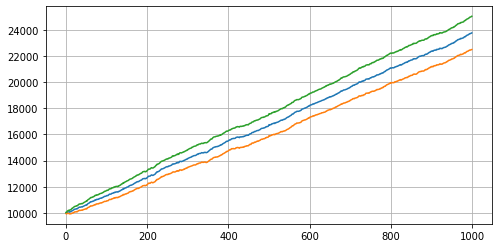

In [19]:
analyzer.plot_simulated_equity_curve(capital=10_000,
                                     nb_simulations=100)

In [20]:
analyzer.ruin_probability(ruin_level=0.8)

  4%|█▊                                       | 45/1000 [01:25<30:16,  1.90s/it]


KeyboardInterrupt: 